<a href="https://colab.research.google.com/github/jxxngho/HG_MLDL/blob/main/08_1_Components_of_Synthetic_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱

밀집층과 달리 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다.

커널 : 입력에 곱하는 가중치

필터 : 뉴런의 개수

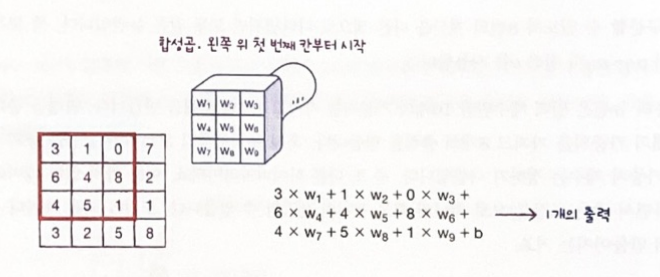

합성곱은 오른쪽 , 아래로 이동하면서 계산함.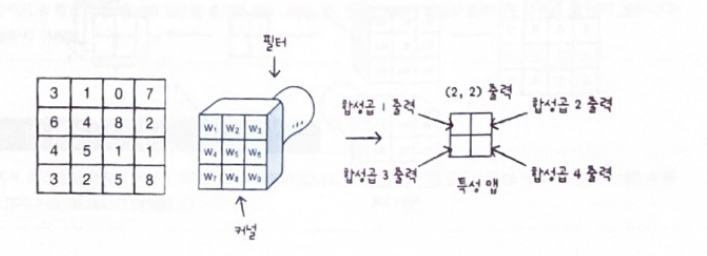

(3,3) 크기의 커널을 이용해서 출력하면 (2,2)크기로 압축가능

합성곱 계산을 통해 얻은 출력을 **특성 맵** 이라고 부른다.

밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여러 개의 필터를 사용한다. (2,2)크기의 특성 맵을 쌓으면 3차원 배열이 된다~

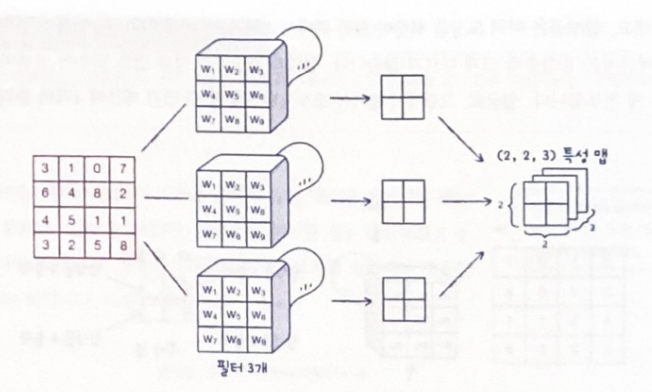

필터마다 가중치가 다 다른 점 !~!

2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이 이미지 처리 분야에서 뛰어난 성능을 발휘한다.

# 케라스 합성곱 층

In [ ]:
# 입력 위를 (왼쪽에서 오른쪽으로, 위에서 아래로) 이동하는 합성곱은 Conv2D클래스로 제공

from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3),activation='relu')

# 첫번째 매개변수 : 필터의 개수
# 두번째          : 커널의 크기
# 세번째          : 활성화 함수

## 패딩

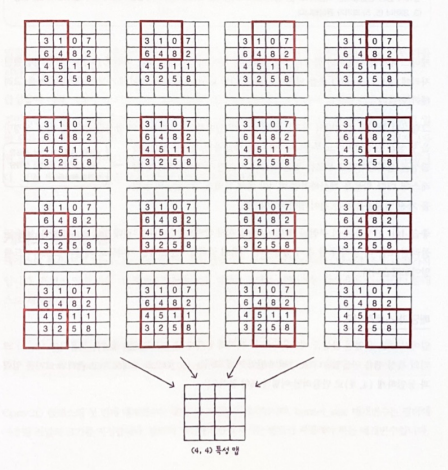

In [ ]:
# 세임 패딩 : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것

## 패딩의 목적

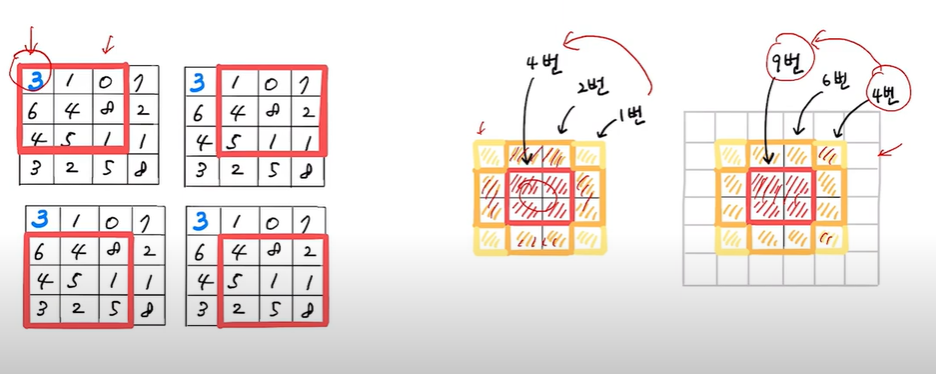

In [ ]:
# (4,4)크기의 입력에 패딩 없이 (3,3)을 합성곱한다면 각 모서리의 값은 한 번 밖에 계산되지 않는다.
# 반면 다른 요소들은 2번 이상 계산되는데, 만약 모서리에 중요한 값이 있을 때 잘 전달되지 않을 가능성이 높다.

# 케라스 Conv2D클래스에서 padding 매개변수로 패딩을 지정가능
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding = 'same')

# 입력과 특성맵의 크기가 같아지도록 자동으로 padding을 추가해짐.

# padding = 'valid' // 맨 처음에 했던 방식, 이러면 특성맵의 크기가 반드시 작아짐!

## 스트라이드

In [ ]:
# 이동 크기
# 기본값은 1이고
# 2이상이면 padding하더라고 특성맵의 크기가 작아질 수 있다.

## 풀링

풀링 : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할, 특성맵의 개수는 줄지 않는다.
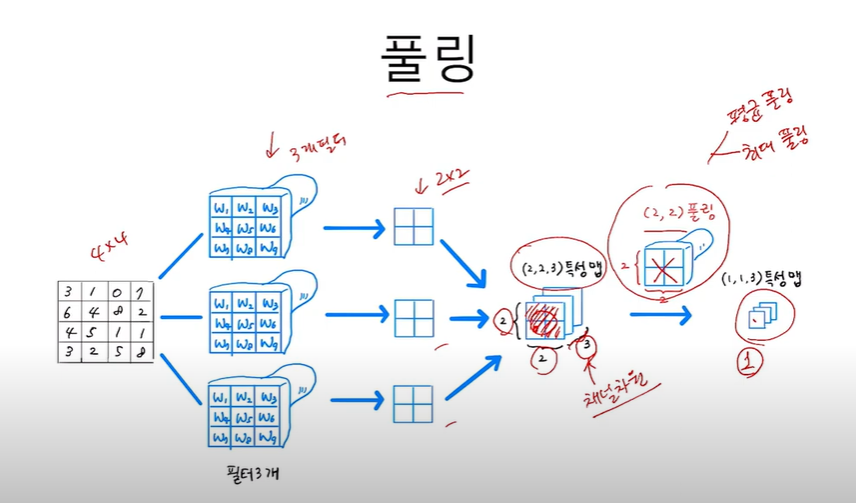

In [ ]:
# 풀링에는 가중치가 없고, 가장 큰 값을 고르거나(최대 풀링), 평균값(평균 풀링)을 계산함.
# 풀링은 겹치지 않기에 풀링의 크기가 (2,2)이면 2칸씩 이동, (3,3)이면 3칸씩 이동한다.
# 풀링의 크기 == 스트라이드
keras.layers.MaxPooling2D(2) # (2,2)크기, 가로세로 크기를 절반으로 줄이는 역할
# strides 와 padding 매개변수도 제공하지만 기본값만 쓰기 때문에 생략하고 사용

# 평균 풀링
keras.layers.AveragePooling2D(2)

# 합성곱 신경망의 전체 구조

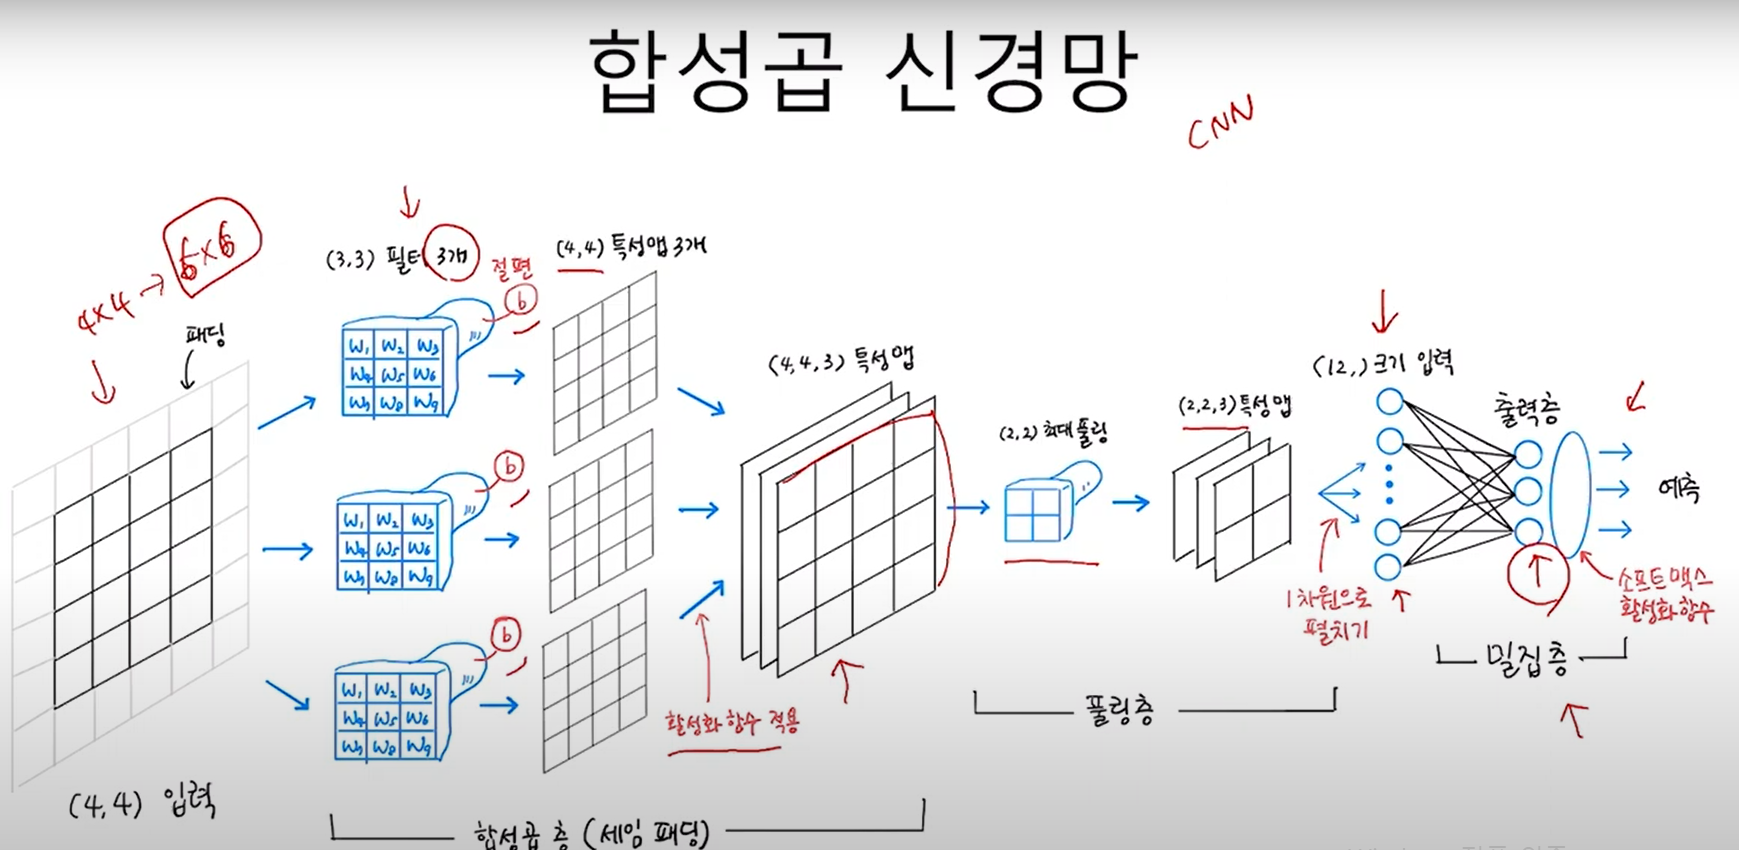

## 컬러 이미지를 사용한 합성곱

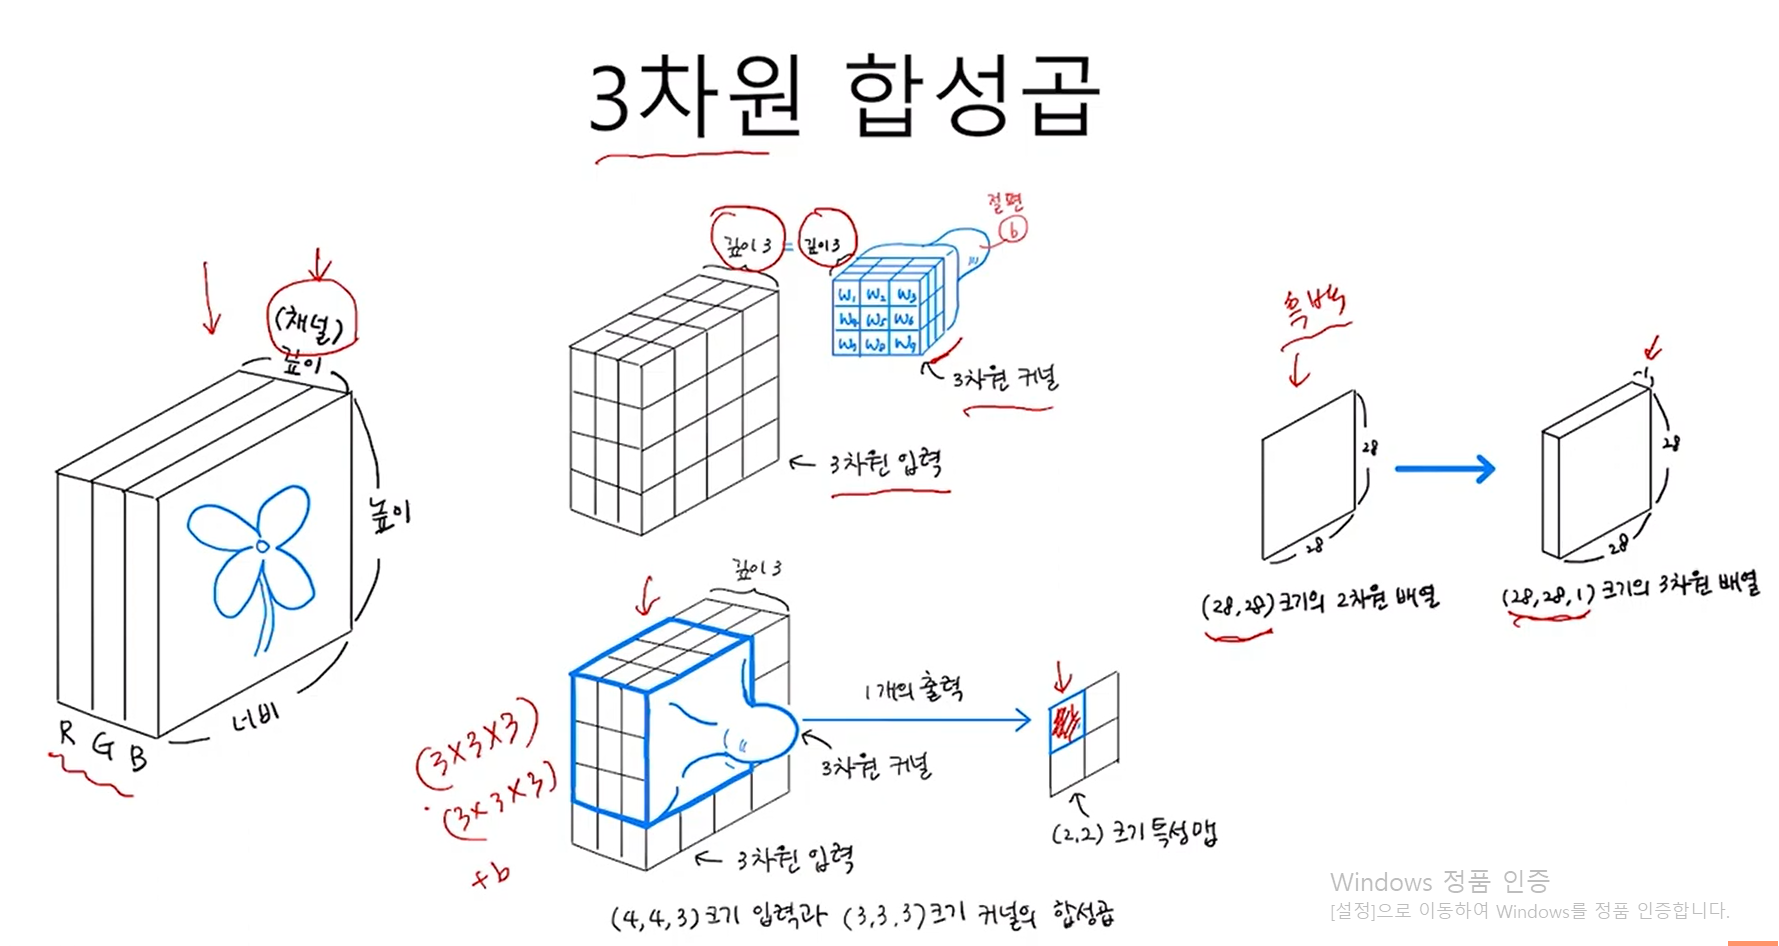

컬러이미지는 RGB 채널로 구성되어 있어서 3차원 배열로 표시

이때는 필터의 커널 크기도 3차원으로 하면 된다.

중요한 점 !! : 입력이나 필터의 차원이 몇 개인지 상관없이 항상 출력은 하나의 값이라는 점 ~

합성곱을 거칠 수록 너비와 높이는 점점 줄어들고 깊이는 점점 깊어짐. 그리고 마지막에 출력층 전에 특성 맵을 1차원으로 펼쳐서 밀집층의 입력으로 사용한다.

합성곱 신경망에서 필터는 이미지에 있는 어떤 특징을 찾는다고 생각할 수 있다. 처음에는 간단한 기본적인 특징(직선, 곡선 등)을 찾고 층이 깊어질수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 개수를 늘림. 또 어떤 특징이 이미지의 어느 위치에 놓이더라도 쉽게 감지할 수 있도록 너비와 높이 차원을 점점 줄여나감.